Split the training set into an 80% training and 20% validation set and conduct / improve upon previous EDA. Build at least three models: an SVM, a logistic regression model, a Naïve Bayes model. Evaluate each of the models’ assumptions. Conduct hyperparameter tuning for the SVM kernel. Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets. Build ROC and Precision / Recall graphs. Evaluate your models' performance on the validation set using the F1-score.  Python scikit-learn should be your primary environment for conducting this research.

In [ ]:
#Libraries
#https://drive.google.com/drive/folders/1Guk1eiIYwPEysI4SqfZ45lnPp4a4SwoV

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#!conda install --yes xgboost
import xgboost

%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, MinMaxScaler

#stats model
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#!conda install --yes lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

# Model Accuracy
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_poisson_deviance, mean_squared_error 

# Import librairies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.getcwd()
%cd /content/gdrive/My Drive/ML_Assignment4/
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/ML_Assignment4/"

/content/gdrive/My Drive/ML_Assignment4
/content/gdrive/My Drive/ML_Assignment4
data.csv
Working Directory
/content/gdrive/My Drive/ML_Assignment4


In [ ]:
#Reading Data into data frame
data_raw = pd.read_csv(work_dir +'data.csv')
print(data_raw)
data_copy = data_raw.copy()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
data_copy.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data_copy.shape

(6819, 96)

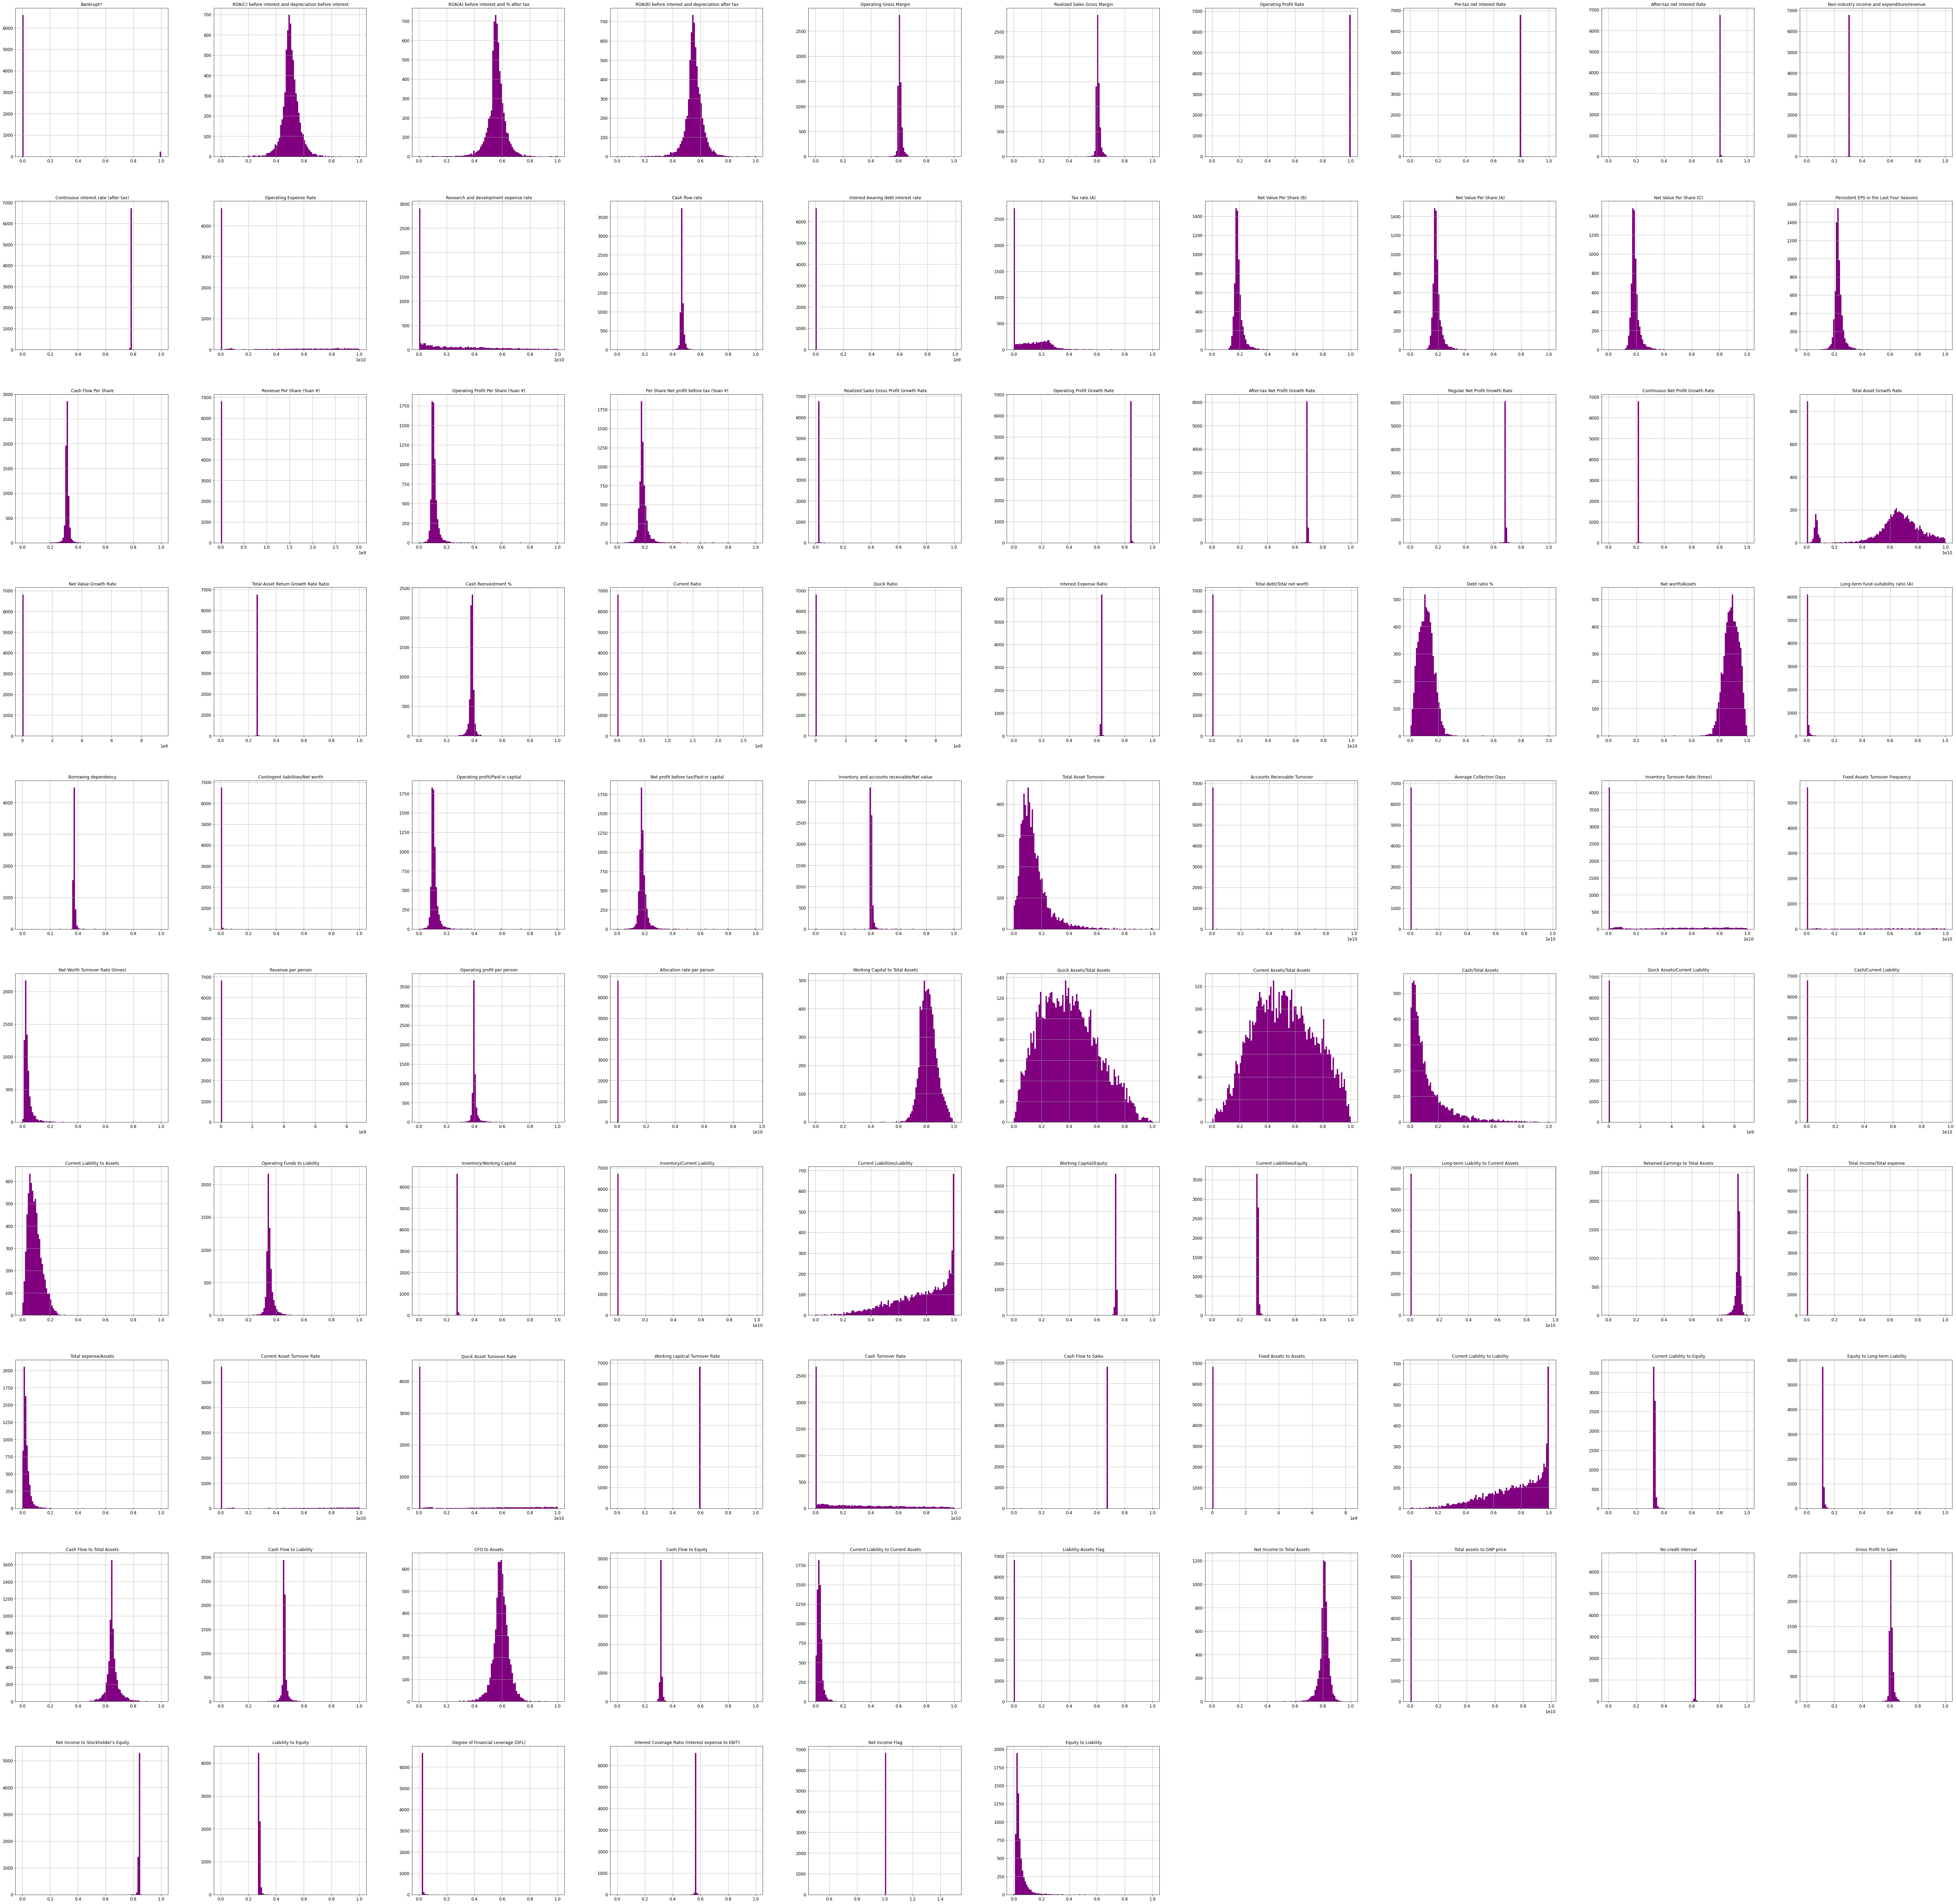

In [ ]:
data_copy.hist(bins=100, figsize=(100,100),color='purple')
plt.show()

In [ ]:
data_copy['Bankrupt?'].describe()

count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt?, dtype: float64

In [ ]:
data_copy['Bankrupt?'].value_counts(1)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [ ]:
data_copy.isnull().sum().any()

False

In [ ]:
# Printing numeric columns and how many there are
num_cols = data_copy._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

Count:  96


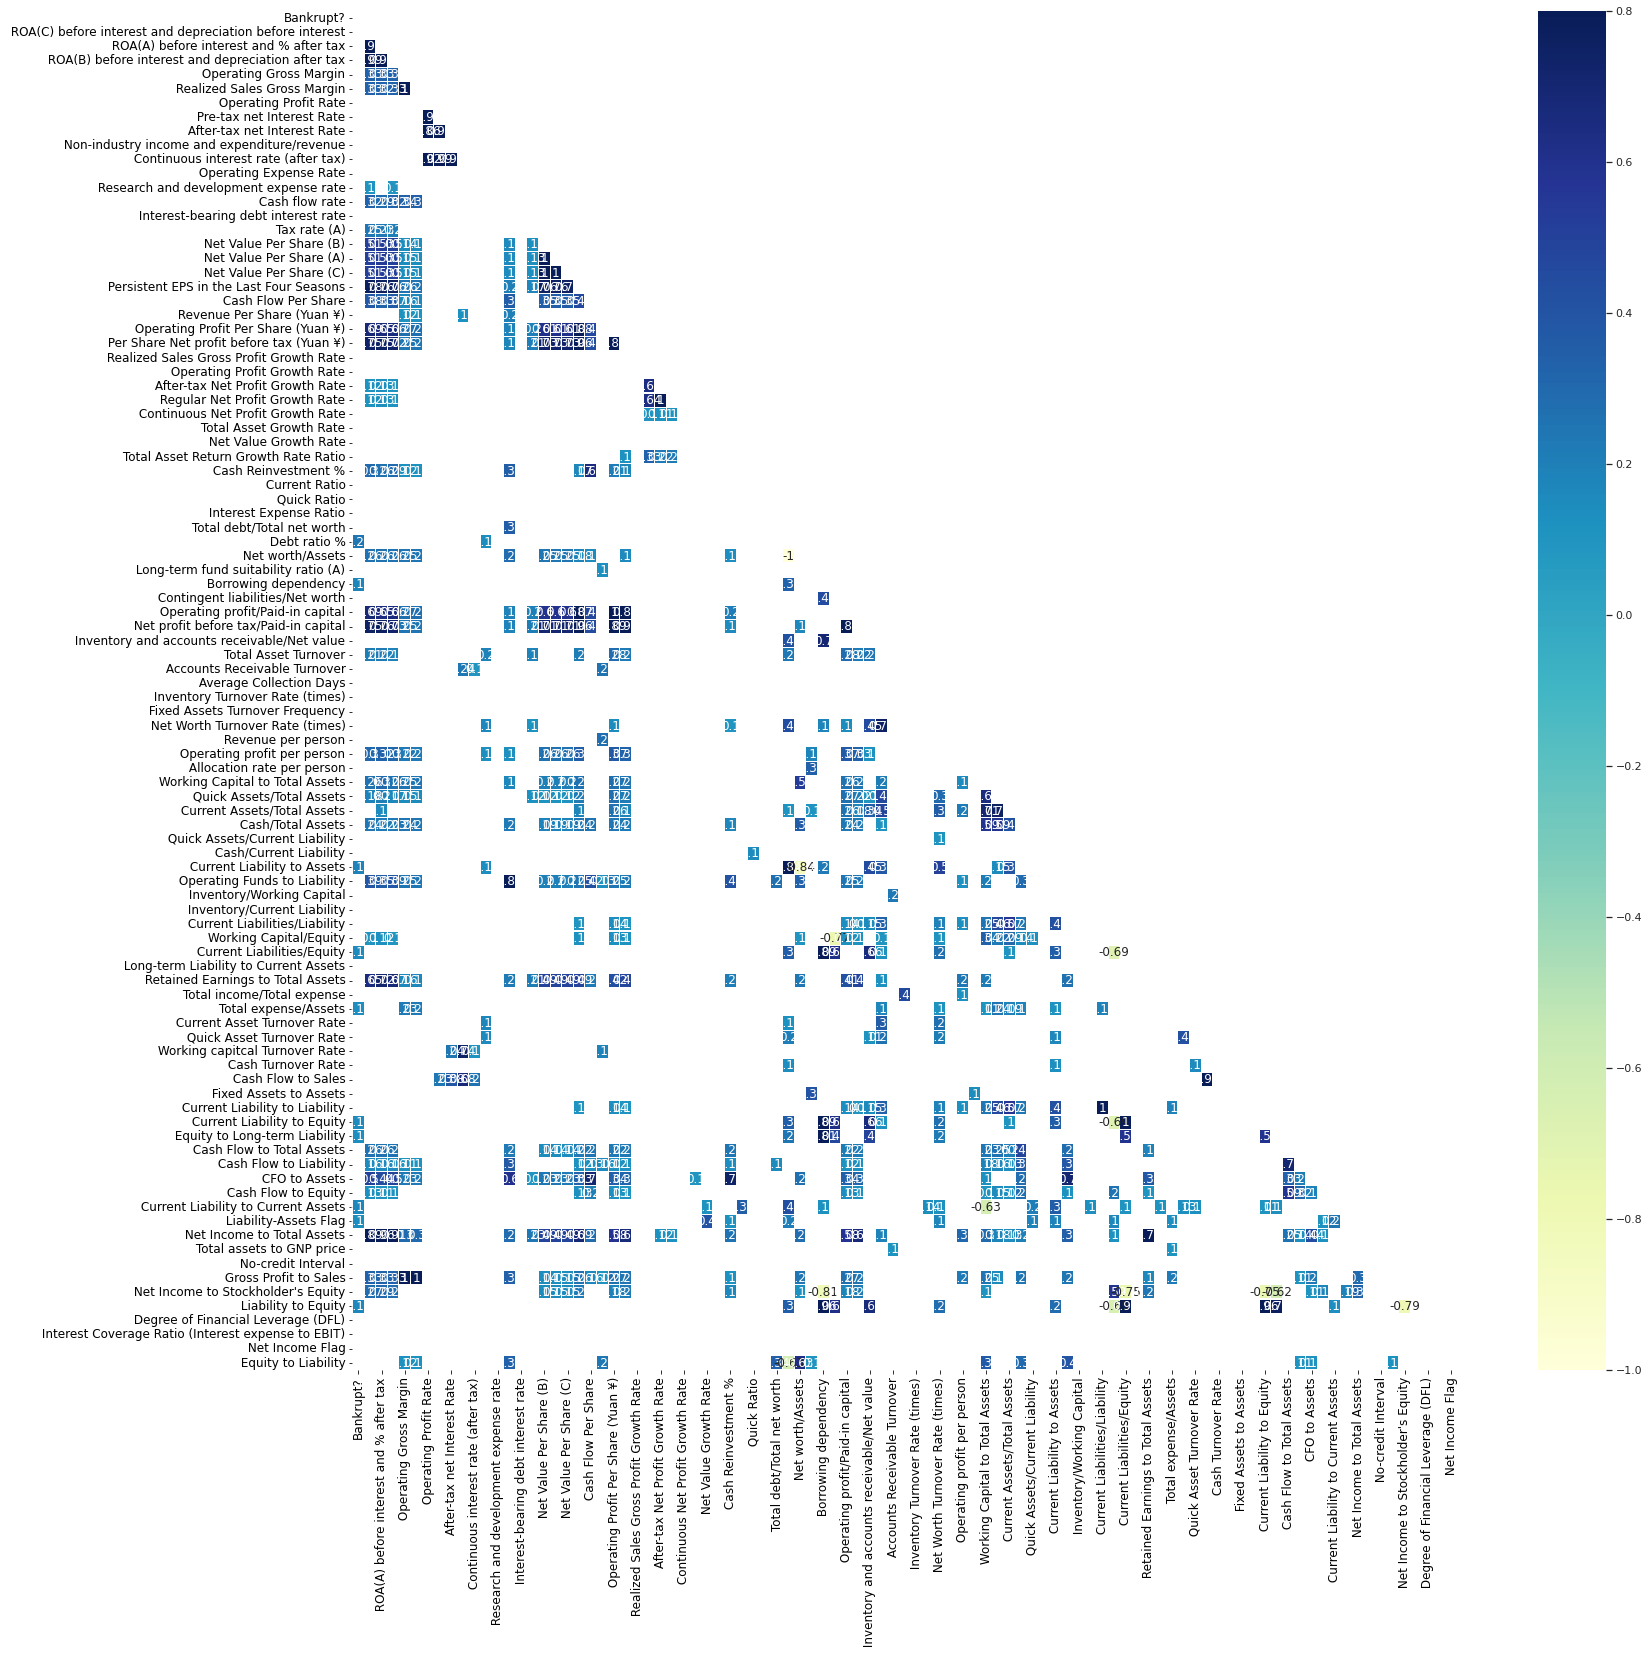

In [ ]:
# Checking Correlation 
corrmat = data_copy.corr()
fig, ax = plt.subplots(figsize=(25,25))  
matrix = np.triu(data_copy.corr())
color = sns.color_palette("YlGnBu", as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corrmat[(corrmat >= 0.1) | (corrmat <= -0.6)], annot=True,vmax=.8, mask=matrix, ax=ax,cmap = color,linewidths=0.1);

In [ ]:
data_copy.corr()['Bankrupt?'][(data_copy.corr()['Bankrupt?']>0.1) & (data_copy.corr()['Bankrupt?']<1)]

 Debt ratio %                           0.250161
 Borrowing dependency                   0.176543
 Current Liability to Assets            0.194494
 Current Liabilities/Equity             0.153828
 Total expense/Assets                   0.139049
 Current Liability to Equity            0.153828
 Equity to Long-term Liability          0.139014
 Current Liability to Current Assets    0.171306
 Liability-Assets Flag                  0.139212
 Liability to Equity                    0.166812
Name: Bankrupt?, dtype: float64

In [ ]:
ntrain = data_copy.shape[0]
#Creating a data frame that will still include Bankrupt?
y_train = data_copy['Bankrupt?'].values
#Dropping Bankrupt? column
data_train=data_copy.drop(['Bankrupt?'], axis=1)
print("all_data size is : {}".format(data_train.shape))

all_data size is : (6819, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.025697,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.769297,-0.012111,-0.034237,-0.092520,-0.026226,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.045967,-0.038333,-0.661726,-0.407123,-0.155185,-0.017024,-0.237123,-0.038222,-2.393729,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-0.034272,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.025697,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.143117,-0.012111,-0.034237,0.372093,-0.026226,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.258227e-14,0.000000,0.458143,7.323965e-13,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,5.814497e-12,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,0.498498,3.504580e-14,0.263100,0.363725,8.214412e-13,1.308510e-13,0.629951,2.139429e-12,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,1.862304e-13,3.584136e-13,1.822749e-14,1.166173e-14,0.032903,3.877887e-12,0.392913,3.880387e-12,0.672775,0.166673,0.190643,0.004094,2.263913e-13,1.526798e-14,0.147308,0.334015,0.276920,1.045399e-13,0.676269,0.721275,0.339077,2.682638e-12,0.903225,0.002022,0.064856,7.010000e-02,6.550000e-01,0.593831,0.0458,0.671568,5.098627e-11,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.0,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.0,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.900751e-14,0.000000,0.461867,6.536007e-13,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,7.001435e-12,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,0.611612,4.748554e-14,0.264516,0.376709,2.187711e-12,4.376345e-13,0.635172,1.257786e-12,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.39772

Plain data:
Scaled data:
Minmax scaled data:


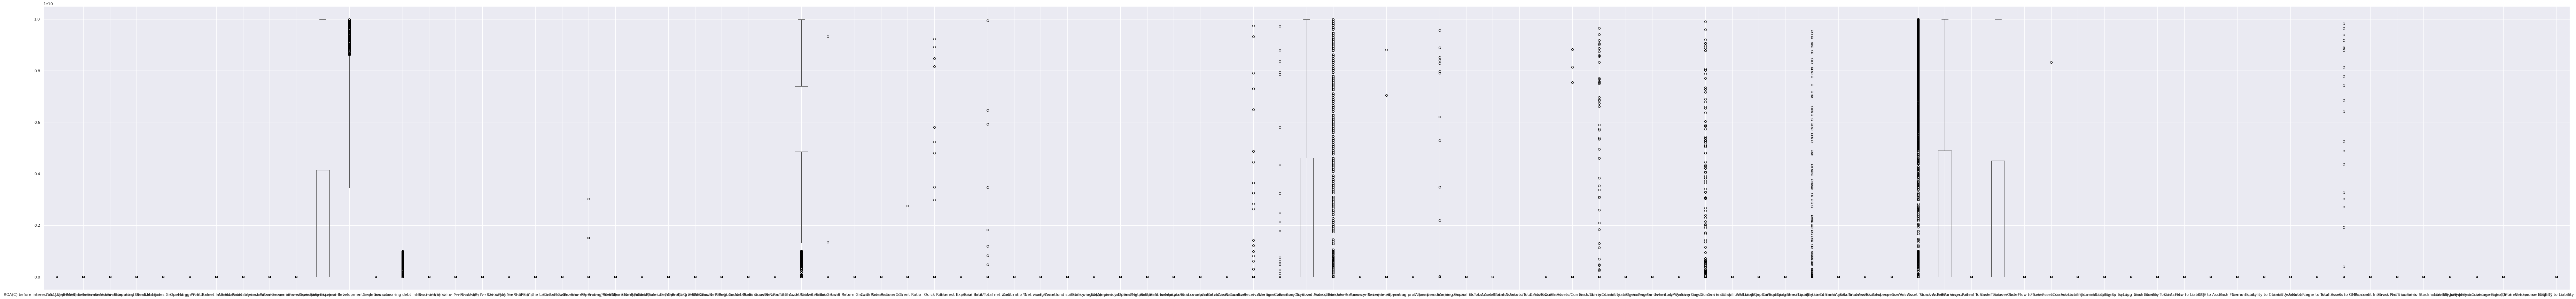

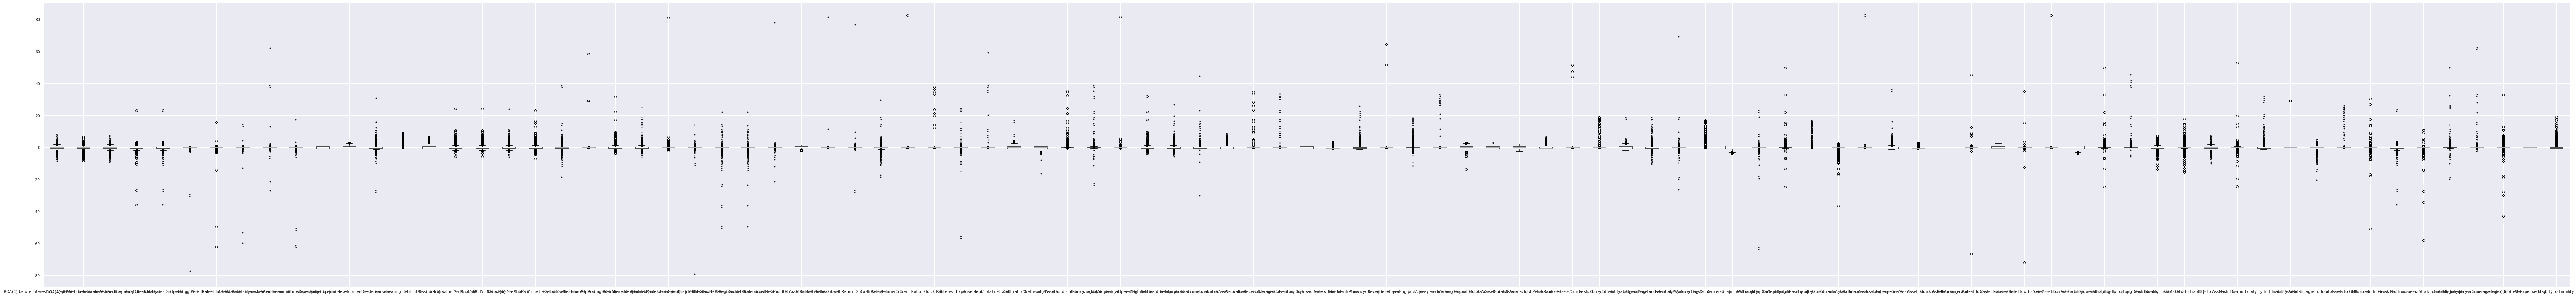

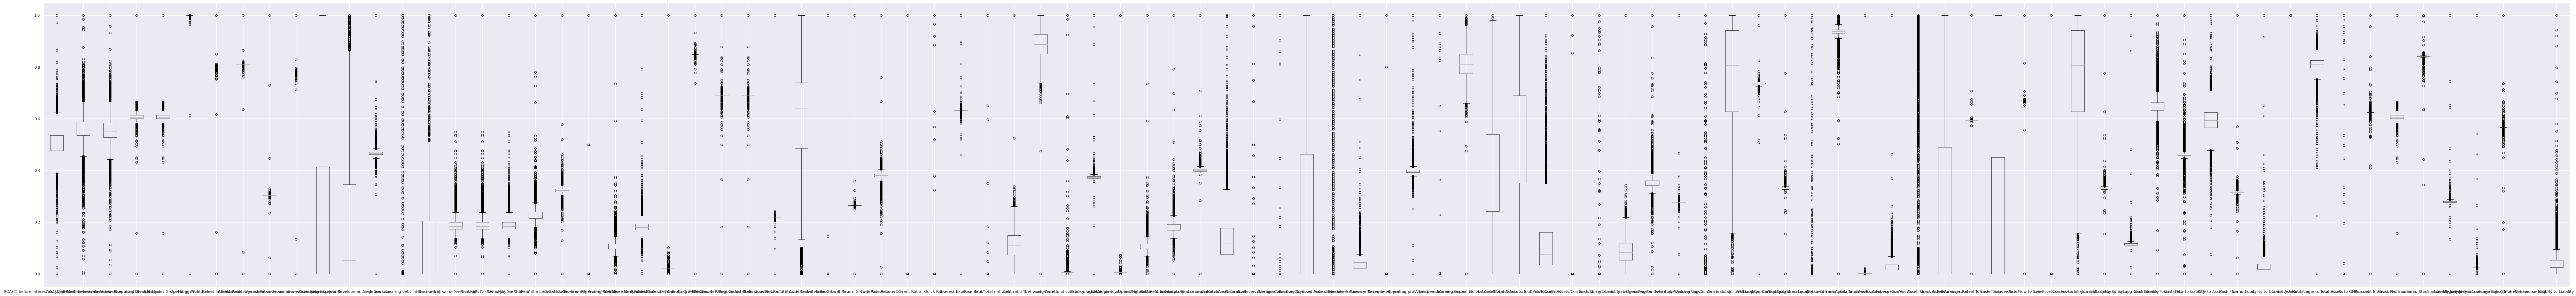

In [ ]:
train_scale = data_train.copy()
train_minmax = data_train.copy()

train_scale[train_scale.columns]=preprocessing.scale(train_scale[train_scale.columns])

# define min max scaler
scaler = MinMaxScaler()
train_minmax[train_minmax.columns] = scaler.fit_transform(train_minmax[train_minmax.columns])

display(data_train.head())
display(train_scale.head())
display(train_minmax.head())
print("Plain data:")

# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
data_train.boxplot()
print("Scaled data:")

# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
train_scale.boxplot()
print("Minmax scaled data:")

# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
train_minmax.boxplot()

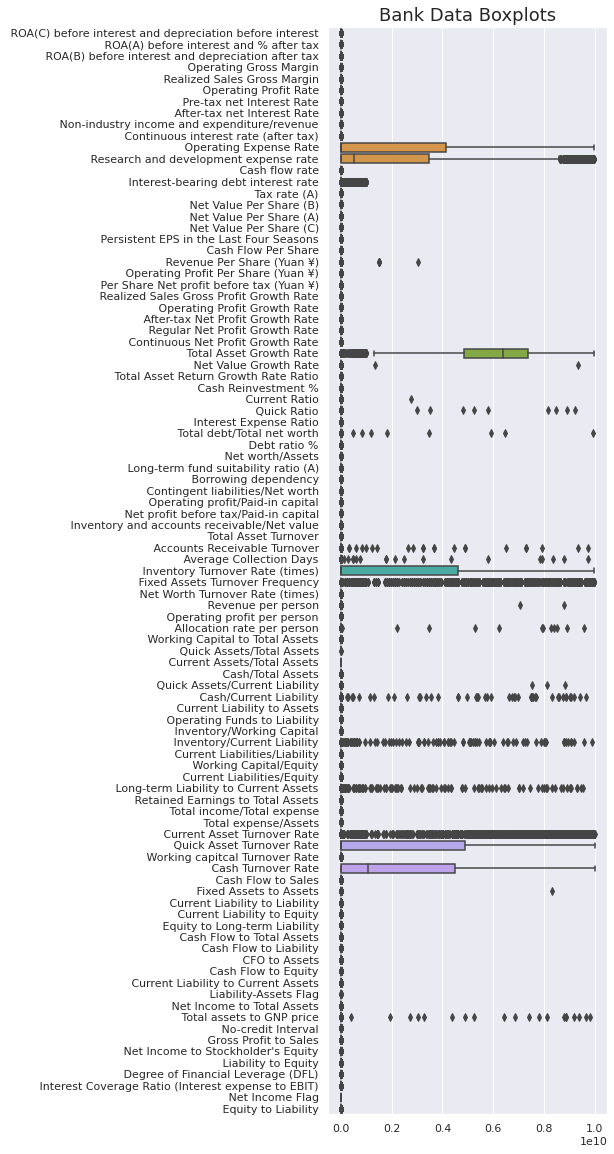

In [ ]:
# Plotting Boxplots of the numerical features
plt.figure(figsize = (5,20))
ax =sns.boxplot(data = data_train, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
plt.show()

2. Split the training set into an 80% training and 20% validation set

In [ ]:
#splitting data in to train and validation sets
train_scale['Bankrupt?'] = y_train

# train-test 80-20 split
train_reg, test_reg = train_test_split(train_scale, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = train_reg.pop('Bankrupt?')
X_train_1 = train_reg

y_test_1 = test_reg.pop('Bankrupt?')
X_test_1 = test_reg

In [ ]:
#Dataset to be used in models
model_columns=X_train_1.columns
model_columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

R^2 Scores:  [-1.78919821e-02 -8.47349179e+16  1.68553721e-01 -1.03999535e+00
 -1.21546453e+00 -2.92540177e+15  8.66938525e-02 -8.60104531e+00
 -3.83871595e+00 -1.78463590e+01]

RMSE Scores:  [-2.10885670e-01 -4.43786252e+07 -1.58371398e-01 -2.09403144e-01
 -2.43294700e-01 -9.40237742e+06 -1.56349052e-01 -4.15852818e-01
 -4.42249888e-01 -8.16228729e-01]
Coefficients= [ 6.32047907e-02  8.16607536e-02 -9.64705022e-02  1.81327660e+00
 -9.83989610e-02 -4.64297437e+02  3.83686210e+02  1.20414298e-02
 -1.90460702e+02 -8.95446072e-02  1.01733956e-03  3.01343364e-03
 -2.90948904e-03  2.50498984e-03 -1.00302201e-02 -4.98021529e-02
 -1.39041662e-01  1.88715470e-01 -8.61025617e-03 -1.47642545e-03
 -5.71734566e-03 -4.31760518e-02  3.67426980e-03  1.73799232e-03
 -4.83829709e-03  9.20011501e-03 -4.04863115e-03  1.34953739e-03
 -1.04363660e-03  2.42282564e-03  5.45494758e-04  2.46435235e-03
 -2.94751834e-03  8.07510987e-04  6.55513979e-04  1.10276799e-03
  4.74709146e+11  4.74709146e+11  6.39219190e

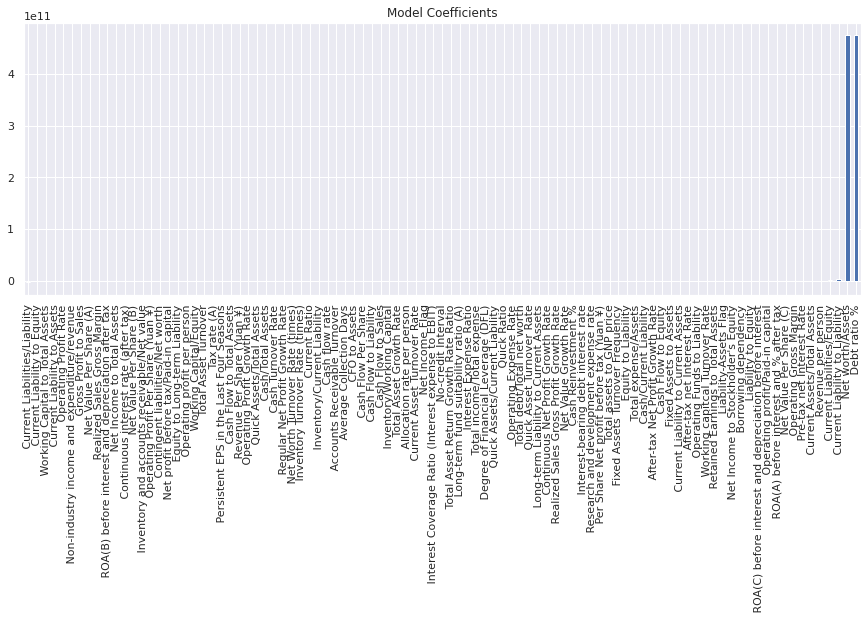

In [ ]:
#Basic linear regression
model = LinearRegression()
model.fit(X_train_1, y_train_1)
predicted_prices_regr = model.predict(X_test_1)

#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_regr, squared=False)
rmse

# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  

# Let us explore the coefficients for each of the independent attributes
print("Coefficients=",model.coef_)

#checking the magnitude of coefficients
predictors = X_train_1.columns
coef = pd.Series(model.coef_.flatten(), predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', figsize=(15,5));

# R square on training data
print("R square on training data:",model.score(X_train_1, y_train_1))
print("R square on training data:",model.score(X_test_1, y_test_1))
RMSE_lr_train = metrics.mean_squared_error(y_true = y_train_1, y_pred=model.predict(X_train_1),squared=False)
RMSE_lr_test = metrics.mean_squared_error(y_true = y_test_1, y_pred=model.predict(X_test_1), squared=False)
resultsDf = pd.DataFrame({'Train RMSE': [RMSE_lr_train],'Test RMSE': [RMSE_lr_test]},index=['LinearRegression'])
print(resultsDf)

3. Build and test at least three models: an SVM, a logistic regression model, a Naïve Bayes model.

In [ ]:
#SVM regression
svc = SVC()
param_svc = {'C':[1,2,3,4,5],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[3,4,5]}

svc_gridsearch = GridSearchCV(estimator=svc,param_grid=param_svc,cv=3,scoring='recall',n_jobs=-1)
svc_gridsearch.fit(X_train_1,y_train_1)
print(svc_gridsearch.best_params_)
print(svc_gridsearch.best_estimator_.score(X_train_1,y_train_1))
print(svc_gridsearch.best_estimator_.score(X_test_1,y_test_1))

## Performance Matrix on test data set
y_pred_svm=svc_gridsearch.best_estimator_.predict(X_test_1)
print(metrics.classification_report(y_true=y_test_1,y_pred=y_pred_svm))

{'C': 4, 'degree': 3, 'kernel': 'sigmoid'}
0.9563703024747938
0.9479472140762464
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1311
           1       0.28      0.21      0.24        53

    accuracy                           0.95      1364
   macro avg       0.62      0.59      0.60      1364
weighted avg       0.94      0.95      0.94      1364



In [ ]:
#Logistic Regression
LR = LogisticRegression(max_iter=100000000000,n_jobs=-1)
## Training data score and model fitting
LR.fit(X_train_1,y_train_1)
LR.score(X_train_1,y_train_1)

0.9747021081576536

In [ ]:
## Test data scoring
LR.score(X_test_1,y_test_1)

0.9574780058651027

3. Conduct hyperparameter tuning for the SVM kernel

In [ ]:
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[1,2,3,4,5,6]}

In [ ]:
LR_tune = GridSearchCV(estimator=LR,param_grid=parameters,cv=3,n_jobs=-1)
LR_tune.fit(X_train_1,y_train_1)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=100000000000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [ ]:
LR_tune.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
LR_tune.best_estimator_.score(X_train_1,y_train_1)

0.9747021081576536

4. Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets

In [ ]:
y_pred_train_lr=LR_tune.best_estimator_.predict(X_train_1)
metrics.confusion_matrix(y_true=y_train_1,y_pred=y_pred_train_lr)

array([[5270,   18],
       [ 120,   47]])

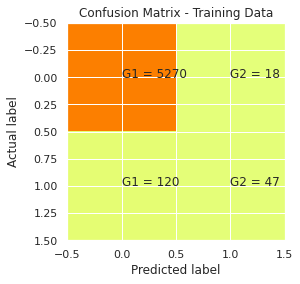

In [ ]:
cm = metrics.confusion_matrix(y_true=y_train_1,y_pred=y_pred_train_lr)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Training Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
## Model evaluation on the test data
y_pred_lr=LR_tune.best_estimator_.predict(X_test_1)
print(metrics.classification_report(y_true=y_test_1,y_pred=y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1311
           1       0.39      0.17      0.24        53

    accuracy                           0.96      1364
   macro avg       0.68      0.58      0.61      1364
weighted avg       0.94      0.96      0.95      1364



In [ ]:
#Gaussian Naive Bayes
GNB_model = GaussianNB()
m_3 = GNB_model.fit(X_train_1,y_train_1)
y_pred_train_gnb = m_3.predict(X_train_1)
model_score = m_3.score(X_train_1, y_train_1)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train_1, y_pred_train_gnb))          ## confusion_matrix
print(metrics.classification_report(y_train_1, y_pred_train_gnb))     ## classification_report

0.4672777268560953
[[2393 2895]
 [  11  156]]
              precision    recall  f1-score   support

           0       1.00      0.45      0.62      5288
           1       0.05      0.93      0.10       167

    accuracy                           0.47      5455
   macro avg       0.52      0.69      0.36      5455
weighted avg       0.97      0.47      0.61      5455



In [ ]:
## Performance Matrix on test data set
y_pred_gnb = m_3.predict(X_test_1)
model_score = m_3.score(X_test_1, y_test_1)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test_1, y_pred_gnb))         ## confusion_matrix
print(metrics.classification_report(y_test_1, y_pred_gnb))    ## classification_report

0.4838709677419355
[[612 699]
 [  5  48]]
              precision    recall  f1-score   support

           0       0.99      0.47      0.63      1311
           1       0.06      0.91      0.12        53

    accuracy                           0.48      1364
   macro avg       0.53      0.69      0.38      1364
weighted avg       0.96      0.48      0.61      1364



5. Build ROC and Precision / Recall graphs.

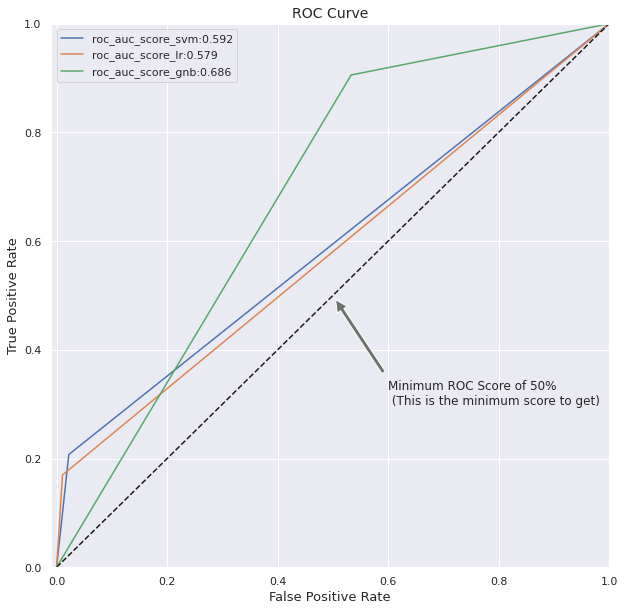

In [ ]:
#ROC curve
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test_1, y_pred_svm)
lr_fpr, lr_tpr, lr_thresold = roc_curve(y_test_1, y_pred_lr)
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_test_1, y_pred_gnb)
roc_auc_score_svm=roc_auc_score(y_test_1, y_pred_svm)
roc_auc_score_lr=roc_auc_score(y_test_1, y_pred_lr)
roc_auc_score_gnb=roc_auc_score(y_test_1, y_pred_gnb)

def graph_roc_curve_multiple(svm_fpr, svm_tpr,lr_fpr, lr_tpr,gnb_fpr, gnb_tpr):
    plt.figure(figsize=(10,10))
    plt.title('ROC Curve', fontsize=14)
    plt.plot(svm_fpr, svm_tpr, label='roc_auc_score_svm:%.5s' % roc_auc_score_svm)
    plt.plot(lr_fpr, lr_tpr, label='roc_auc_score_lr:%.5s' % roc_auc_score_lr)
    plt.plot(gnb_fpr, gnb_tpr, label='roc_auc_score_gnb:%.5s' % roc_auc_score_gnb)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(svm_fpr, svm_tpr,lr_fpr, lr_tpr,gnb_fpr, gnb_tpr)
plt.show()

In [ ]:
#Precision Recall Display Curve


